In [1]:
comp_list = [str(x) for x in range(1431, 1510)]
print(comp_list)

['1431', '1432', '1433', '1434', '1435', '1436', '1437', '1438', '1439', '1440', '1441', '1442', '1443', '1444', '1445', '1446', '1447', '1448', '1449', '1450', '1451', '1452', '1453', '1454', '1455', '1456', '1457', '1458', '1459', '1460', '1461', '1462', '1463', '1464', '1465', '1466', '1467', '1468', '1469', '1470', '1471', '1472', '1473', '1474', '1475', '1476', '1477', '1478', '1479', '1480', '1481', '1482', '1483', '1484', '1485', '1486', '1487', '1488', '1489', '1490', '1491', '1492', '1493', '1494', '1495', '1496', '1497', '1498', '1499', '1500', '1501', '1502', '1503', '1504', '1505', '1506', '1507', '1508', '1509']


Preparing vertex data...
Components count after removal: 1


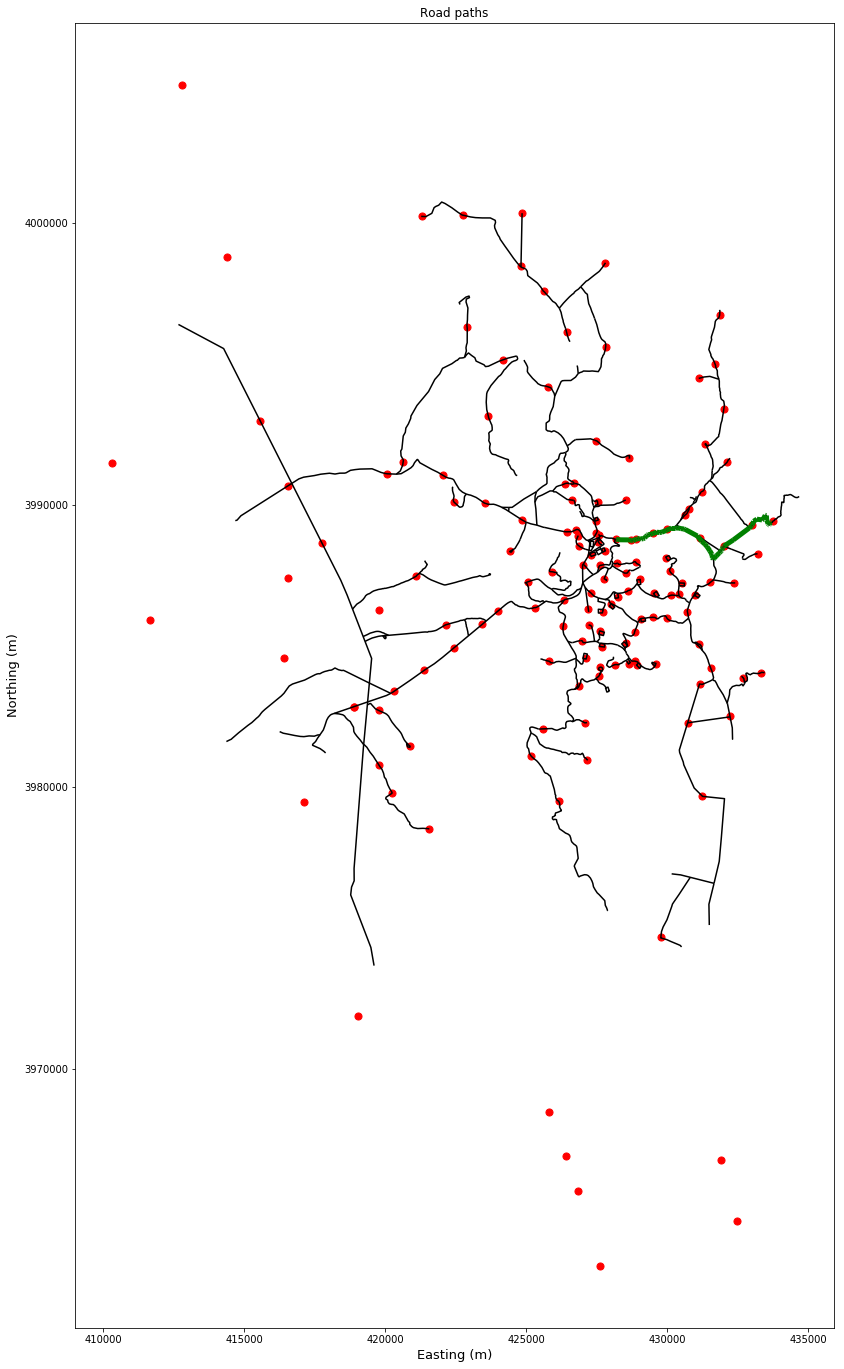

In [5]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import files
import geopandas as gpd
import matplotlib.pyplot as plt
import graph_util as gutil
from matplotlib.pyplot import figure
from shapely.geometry import LineString

def main():
    crs = '+proj=utm +zone=11 +datum=WGS84'

    print("Preparing vertex data...")

    path_vertex_id = ['1431', '1432', '1433', '1434', '1435', '1436', '1437', '1438', '1439', '1440', '1441', '1442', '1443', '1444', '1445', '1446', '1447', '1448', '1449', '1450', '1451', '1452', '1453', '1454', '1455', '1456', '1457', '1458', '1459', '1460', '1461', '1462', '1463', '1464', '1465', '1466', '1467', '1468', '1469', '1470', '1471', '1472', '1473', '1474', '1475', '1476', '1477', '1478', '1479', '1480', '1481', '1482', '1483', '1484', '1485', '1486', '1487', '1488', '1489', '1490', '1491', '1492', '1493', '1494', '1495', '1496', '1497', '1498', '1499', '1500', '1501', '1502', '1503', '1504', '1505', '1506', '1507', '1508', '1509']
    gdf_lines = get_lines_gdf(path_vertex_id, crs, 
            "../" + files.roads_pads_network_utm_geojson, 
            "../" + files.roads_correction_utm_csv)
    plot_lines(gdf_lines, crs, 
            "../" + files.roads_pads_network_utm_geojson, 
            "../" + files.closest_to_road_geojson_utm)


def get_lines_gdf(path_vertex_id, crs, 
            roads_network_geojson, roads_correction_csv):
    coords = []

    # get graph adjancency and coordinates
    # id: {
    #     adj: {adjacent vertices id},
    #     coordinates: [easting, northing] }
    graph_dic = gutil.get_graph(roads_network_geojson, roads_correction_csv)

    # construct connected lines
    for i in range(len(path_vertex_id) - 1):
        x1, y1 = graph_dic[path_vertex_id[i]]['coordinates']
        x2, y2 = graph_dic[path_vertex_id[i + 1]]['coordinates']
        conn = (x1, y1), (x2, y2)
        line_string = LineString(conn)
        coords.append(line_string)
            
    # creating lines' geographic dataframe 
    gdf_lines = gpd.GeoDataFrame(crs=crs, geometry=coords)

    return gdf_lines


def plot_lines(gdf_lines, crs, data_roads_pads_network_geojson, 
            data_closet_at_road_geojson):
    plt.rcParams['figure.figsize'] = (30, 24)

    # plot the whole route map and stations for reference
    gdf_roads = gpd.read_file(data_roads_pads_network_geojson)
    gdf_stations = gpd.read_file(data_closet_at_road_geojson)
    gdf_roads.crs = crs
    gdf_stations.crs = crs

    # to avoid a feature covered by another, the sequence of plot matters
    ax = gdf_roads.plot(color='black')
    ax = gdf_lines.plot(ax=ax, color='green', linewidth=5)
    gdf_stations.plot(ax=ax, color='red', markersize=50)

    plt.title('Road paths')
    plt.xlabel('Easting (m)', fontsize=13)
    plt.ylabel('Northing (m)', fontsize=13)

    plt.show()
    return


if __name__ == '__main__':
    main()


In [3]:
station_list = {'CS25', 'CS26', 'COSO2', 'CS44', 'CS43'}